### Calculo de Ratios

#### liquidez
* Razón corriente = Activos corrientes / Pasivos corrientes
* Prueba ácida = (Activo corriente - Inventarios) / Pasivo corriente

#### Solvencia y endeudamiento
* Endeudamiento total = Total de pasivos / Total de activos
* Endeudamiento de largo plazo = Pasivo no corriente / Total de activos
* Cobertura de intereses = EBIT / Gastos por intereses

#### Rentabilidad
* ROA (Return on Assets) = Beneficio neto / Activo total
* ROE (Return on Equity) =  Beneficio neto / Patrimonio neto
* Margen de utilidad = 	Beneficio neto / Ventas (ingresos totales) (escrapeado "Margen del beneficio neto %")
* Rotación de activos = ingresos totales / Total de activos
* Rotación de inventarios = ingresos totales / Inventario

In [63]:
import sqlite3
import pandas as pd
pd.options.display.max_rows = 999

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_anuales")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df.loc[df["company"] == "ypf-sa", "company"] = "YPF"

In [64]:
indicadores = df.groupby(["informe","seccion","indicador"]).size()

print(indicadores)

informe     seccion            indicador                                                    
balance     activo_corriente   Crecimiento de efectivo y equivalentes                           125
                               Créditos totales                                                 125
                               División financiera, préstamos y arrendamientos corrientes        20
                               División financiera, total de otros activos corrientes            15
                               Efectivo restringido                                              49
                               Efectivo y equivalentes                                          125
                               Gastos pagados por adelantado                                     75
                               Inventario                                                       117
                               Inversiones a corto plazo                                        100
       

In [65]:
# rubros que componen cada seccion
# no se incluye por ejemplo el rubro "otros creditos" ya que forma parte de "Creditos totales"
activo_corriente = [
    "Efectivo y equivalentes",
    "Inversiones a corto plazo",
    "Créditos totales",
    "Inventario",
    "Gastos pagados por adelantado",
    "Otros activos corrientes"
]
activo_no_corriente = [
    "Planta, propiedad y equipo, neto",
    "Inversiones a largo plazo",
    "Activos intangibles",
    "Total de otros activos"
]
pasivo_corriente = [
    "Total de cuentas por pagar",
    "Total de gastos devengados",
    "Préstamos a corto plazo",
    "Parte actual de la deuda a largo plazo/arrendamientos",
    "Total de otros pasivos corrientes"
]
pasivo_no_corriente = [
    "Deuda a largo plazo",
    "Arrendamientos a largo plazo",
    "Total de otros pasivos"
]
patrimonio_neto = [
    "Total de acciones preferentes",
    "Acciones ordinarias y APIC",
    "Ganancias retenidas",
    "Acciones propias y otras",
    "Intereses minoritarios"
]

inventario = ["Inventario"]

EBIT = ["EBIT"]
	
intereses = ["Total de gastos de intereses"]

beneficio_neto = ["Beneficio neto"]

mbn = ["Margen del beneficio neto %"]

ing = ["Ingresos totales"]

In [66]:
# features de indicadores ya escrapeados

indicadores_scrapeados = [
  "Crecimiento de efectivo y equivalentes",
  "Crecimiento de activos totales",
  "Crecimiento del pasivo total",
  "Crecimiento de la deuda total",
  "Crecimiento del beneficio neto",
  "Crecimiento del EBITDA",
  "Crecimiento de los ingresos totales"
]

In [67]:
ac = pd.pivot_table(df[df.indicador.isin(activo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_corriente"})
anc = pd.pivot_table(df[df.indicador.isin(activo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_no_corriente"})
pc = pd.pivot_table(df[df.indicador.isin(pasivo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_corriente"})
pnc = pd.pivot_table(df[df.indicador.isin(pasivo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_no_corriente"})
pn = pd.pivot_table(df[df.indicador.isin(patrimonio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"patrimonio_neto"})
inv = pd.pivot_table(df[df.indicador.isin(inventario)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"inventario"})
ebit = pd.pivot_table(df[df.indicador.isin(EBIT)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"EBIT"})
int = pd.pivot_table(df[df.indicador.isin(intereses)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"intereses"})
bn = pd.pivot_table(df[df.indicador.isin(beneficio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"beneficio_neto"})
mbn = pd.pivot_table(df[df.indicador.isin(mbn)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"margen_beneficio_neto"})
ingt = pd.pivot_table(df[df.indicador.isin(ing)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"ingresos_totales"})

data = pd.concat([ac,anc,pc,pnc,pn,inv,ebit,int,bn,mbn,ingt], axis=1)
data.round(2)

activo_corriente  activo_no_corriente  \
company                ejercicio                                          
3m-co                  2020                14975.0              32362.0   
                       2021                15403.0              31669.0   
                       2022                14688.0              31767.0   
                       2023                16379.0              34201.0   
                       2024                15884.0              23984.0   
YPF                    2020               317687.0            1595656.0   
                       2021               456211.0            1923825.0   
                       2022               897680.0            3677450.0   
                       2023              3486126.0           16624393.0   
                       2024              6598756.0           23287159.0   
adv-micro-device       2020                 6143.0               2819.0   
                       2021                 8583.0               3836.0   
                       2022                15019.0              52561.0   
                       2023                16768.0              51117.0   
                       2024                19049.0              50177.0   
amazon-com-inc         2020               132733.0             188462.0   
                       2021               161580.0             258969.0   
                       2022               146791.0             315884.0   
                       2023               172351.0             355503.0   
                       2024               190867.0             434027.0   
apple-computer-inc     2020               143713.0             180175.0   
                       2021               134836.0             216166.0   
                       2022               135405.0             217350.0   
                       2023               143566.0             209017.0   
                       2024               152987.0             211993.0   
at-t                   2020                52008.0             473753.0   
                       2021               170768.0             380854.0   
                       2022                33108.0             369745.0   
                       2023                36458.0             370602.0   
                       2024                31168.0             363627.0   
berkshire-hathaway-inc 2020               194026.0             679703.0   
                       2021               208089.0             750695.0   
                       2022               203413.0             745052.0   
                       2023               245712.0             824266.0   
                       2024               407447.0             746434.0   
boeing-co              2020               121541.0              28558.0   
                       2021               108549.0              28191.0   
                       2022               109369.0              26127.0   
                       2023               109176.0              26877.0   
                       2024               127791.0              28051.0   
caterpillar            2020                29451.0              22481.0   
                       2021                33731.0              22713.0   
                       2022                33810.0              22303.0   
                       2023                36567.0              23877.0   
                       2024                35393.0              25010.0   
chevron                2020                26078.0             213712.0   
                       2021                33738.0             205797.0   
                       2022                50343.0             207366.0   
                       2023                41128.0             220504.0   
                       2024                40911.0             216027.0   
coca-cola-co           2020                19240.0              68056.0   
                       2021                22544.0         

In [68]:
data["inventario"] = data["inventario"].fillna(0)
data["intereses"] = data["intereses"].fillna(0)
data["intereses"] = data["intereses"].abs()
data["razon_corriente"] = data["activo_corriente"] / data["pasivo_corriente"]
data["activo_total"] = data["activo_corriente"] + data["activo_no_corriente"]
data["pasivo_total"] = data["pasivo_corriente"] + data["pasivo_no_corriente"]
data["prueba_acida"] = (data["activo_corriente"] - data["inventario"]) / data["pasivo_corriente"]
data["endeudamiento"] = (data["pasivo_total"]) / (data["activo_total"])
data["endeudamiento_a_largo_plazo"] = data["pasivo_no_corriente"] / (data["activo_total"])
data["covertura_de_intereses"] = data["EBIT"] / data["intereses"]
data.loc[data["intereses"] == 0, "covertura_de_intereses"] = 0
data["ROA"] = data["beneficio_neto"] / data["activo_total"]
data["ROE"] = data["beneficio_neto"] / data["patrimonio_neto"]
data["rotacion_activos"] = data["ingresos_totales"] / data["activo_total"]
data["rotacion_inventario"] = data["ingresos_totales"] / data["inventario"]
data.loc[data["inventario"] == 0, "rotacion_inventario"] = 0


In [69]:
features = [
    "razon_corriente",
    "prueba_acida",
    "endeudamiento",
    "endeudamiento_a_largo_plazo",
    "covertura_de_intereses",
    "ROA",
    "ROE",
    "rotacion_activos",
    "rotacion_inventario"
]

In [70]:
data[features].reset_index().round(2)

,company,ejercicio,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario
0,3m-co,2020,1.88,1.35,0.73,0.56,13.53,0.12,0.42,0.68,7.59
1,3m-co,2021,1.70,1.15,0.68,0.49,15.89,0.13,0.39,0.75,7.09
2,3m-co,2022,1.54,0.98,0.68,0.48,7.25,0.12,0.39,0.56,4.87
3,3m-co,2023,1.07,0.81,0.90,0.60,4.55,-0.14,-1.44,0.49,6.24
4,3m-co,2024,1.41,1.08,0.90,0.62,3.60,0.10,1.08,0.62,6.65
5,YPF,2020,0.86,0.59,0.65,0.45,-1.03,-0.04,-0.10,0.36,6.92
6,YPF,2021,1.17,0.77,0.65,0.48,1.32,0.00,0.00,0.55,8.55
7,YPF,2022,1.06,0.70,0.59,0.41,3.19,0.06,0.15,0.55,8.21
8,YPF,2023,0.88,0.54,0.64,0.44,0.69,-0.08,-0.21,0.27,4.04
9,YPF,2024,0.74,0.56,0.60,0.31,2.62,0.07,0.17,0.60,11.23


In [71]:
# datos variaciones de los precios de las acciones

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_variacion")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df_var = pd.DataFrame(filas, columns=column_names)
df_var["ejercicio"] = df_var["ejercicio"] - 1
df_var


,id,company,ticker,ejercicio,variacion
0,151,apple-computer-inc,AAPL,2019,81.168225
1,152,apple-computer-inc,AAPL,2020,39.468276
2,153,apple-computer-inc,AAPL,2021,-28.376335
3,154,apple-computer-inc,AAPL,2022,54.798216
4,155,apple-computer-inc,AAPL,2023,38.354970
5,156,microsoft-corp,MSFT,2019,41.031348
6,157,microsoft-corp,MSFT,2020,58.397840
7,158,microsoft-corp,MSFT,2021,-27.328368
8,159,microsoft-corp,MSFT,2022,58.349726
9,160,microsoft-corp,MSFT,2023,16.954580


In [73]:
dt = pd.merge(data[features].reset_index(), df_var, on=["company","ejercicio"], how="left")
dt.drop(columns=["ticker","id","ejercicio"], inplace=True)
dt.drop(dt[dt["company"]=="tesla-motors"].index, inplace=True,axis=0)
dt

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,1.884122,1.350780,0.726979,0.559076,13.527410,0.115111,0.421521,0.679891,7.592357,7.100173
1,3m-co,1.704815,1.153071,0.678854,0.486914,15.889344,0.125786,0.391886,0.751083,7.092277,-29.288682
2,3m-co,1.542371,0.978263,0.682058,0.477064,7.246753,0.124357,0.391502,0.563147,4.869881,-5.340940
3,3m-co,1.070733,0.812904,0.903756,0.601325,4.549416,-0.138296,-1.441674,0.486556,6.239858,46.447312
4,3m-co,1.411158,1.082623,0.902328,0.619996,3.602015,0.104670,1.075793,0.616409,6.645484,NaN
5,YPF,0.857064,0.586912,0.647991,0.454263,-1.030385,-0.036402,-0.101713,0.361939,6.915666,-11.725663
6,YPF,1.166547,0.772951,0.647868,0.483552,1.320913,0.000108,0.000303,0.552779,8.547123,124.009908
7,YPF,1.059954,0.696553,0.594487,0.409376,3.187363,0.063180,0.154816,0.552217,8.209048,97.359362
8,YPF,0.878164,0.536152,0.641371,0.443973,0.693899,-0.077632,-0.214590,0.272720,4.039537,158.111369
9,YPF,0.738156,0.559884,0.604142,0.305021,2.622565,0.069514,0.170472,0.598778,11.228847,NaN


# aqui quedamos!

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
columns_to_normalize = [
  'razon_corriente', 'prueba_acida', 'endeudamiento', 
  'endeudamiento_a_largo_plazo', 'covertura_de_intereses', 
  'ROA', 'ROE', 'rotacion_activos', 'rotacion_inventario'
]

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización
dt_normalized = dt.copy()
dt_normalized.loc[dt_normalized['variacion']>0, 'variacion'] = 1
dt_normalized.loc[dt_normalized['variacion']<=0, 'variacion'] = 0
dt_normalized[columns_to_normalize] = scaler.fit_transform(dt[columns_to_normalize])

# Mostrar el DataFrame normalizado
dt_normalized = dt_normalized[dt_normalized['variacion'].notna()]

In [75]:
dt_normalized

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,0.241199,0.181744,0.569810,0.509907,0.050845,0.348014,0.765186,0.373011,0.015784,1.0
1,3m-co,0.212653,0.147314,0.520716,0.436922,0.056279,0.360953,0.762517,0.433030,0.014744,0.0
2,3m-co,0.186791,0.116871,0.523985,0.426960,0.036394,0.359221,0.762483,0.274588,0.010124,0.0
3,3m-co,0.111703,0.088074,0.750143,0.552637,0.030188,0.040879,0.597363,0.210017,0.012972,1.0
5,YPF,0.077686,0.048717,0.489233,0.403899,0.017350,0.164377,0.718057,0.104957,0.014377,0.0
6,YPF,0.126957,0.081116,0.489108,0.433522,0.022760,0.208628,0.727246,0.265847,0.017769,1.0
7,YPF,0.109987,0.067811,0.434653,0.358501,0.027055,0.285073,0.741164,0.265374,0.017066,1.0
8,YPF,0.081045,0.039877,0.482480,0.393491,0.021318,0.114405,0.707890,0.029740,0.008398,1.0
10,adv-micro-device,0.345871,0.288321,0.183916,0.024359,0.086737,0.545246,0.765643,0.718233,0.014508,1.0
11,adv-micro-device,0.263515,0.218738,0.232508,0.000000,0.266579,0.517091,0.765209,0.915440,0.017476,0.0


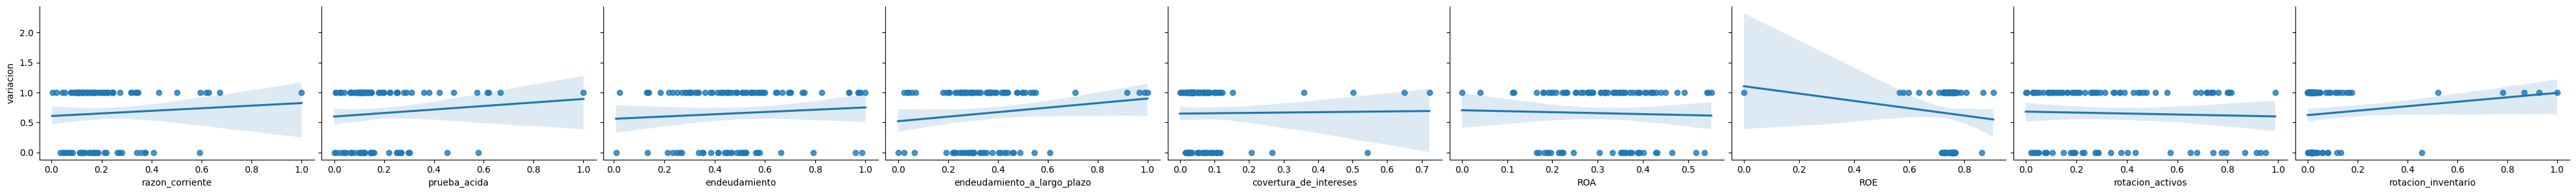

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el correlograma
sns.pairplot(dt_normalized.reset_index(), y_vars=["variacion"], x_vars=features, kind="reg", height=3, aspect=1.5)

# Mostrar el gráfico
plt.show()


In [77]:
dt.isna().sum()

company                         0
razon_corriente                 0
prueba_acida                    0
endeudamiento                   0
endeudamiento_a_largo_plazo     0
covertura_de_intereses          0
ROA                             0
ROE                             0
rotacion_activos                0
rotacion_inventario             0
variacion                      25
dtype: int64

In [53]:
dt_normalized.shape

(56, 11)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


dt_normalized = dt_normalized[dt_normalized["variacion"].notna()]
# Separar las características (X) y el target (y)
X = dt_normalized.drop(columns=["variacion", "company"])
y = dt_normalized["variacion"]

# Dividir los datos en conjuntos de entrenamiento y prueba



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = model.score(X_test, y_test)
print(f"Accuracy: {acc}")

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Accuracy: 0.7368421052631579
Mean Squared Error: 0.2631578947368421
R^2 Score: -0.3571428571428572


In [79]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        "n_estimators": 2000,
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.01, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 0.01, 1.0),
        "verbose": -1,
    }

    model = lgb.LGBMClassifier(**param, early_stopping_rounds=50)

    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="auc",

    )

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return 1 - auc  # Minimizar: 1 - AUC

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:")
print(study.best_params)

[I 2025-04-08 20:36:56,646] A new study created in memory with name: no-name-38b039b8-9d23-452d-8060-f9de84b168c3
C:\Users\carre\AppData\Local\Temp\ipykernel_1796\147230598.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\carre\AppData\Local\Temp\ipykernel_1796\147230598.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
C:\Users\carre\AppData\Local\Temp\ipykernel_1796\147230598.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

Mejores hiperparámetros:
{'learning_rate': 0.001668051078583239, 'max_depth': 9, 'num_leaves': 137, 'min_child_samples': 67, 'subsample': 0.7336906691268124, 'colsample_bytree': 0.7041535700083685, 'reg_alpha': 0.8388004824350819, 'reg_lambda': 0.1347832046472841}


In [80]:
model = lgb.LGBMClassifier(**study.best_params, early_stopping_rounds=50)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred_proba)
acc = model.score(X_test, y_test)
print(f"Accuracy: {acc}")
print(f"AUC: {auc}")
print(f"Mean Squared Error: {mse}")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.601374
Accuracy: 0.7368421052631579
AUC: 0.5
Mean Squared Error: 0.20498614958448758


In [82]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Asumimos que ya tenés tus datos en X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc  # Maximizar accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros:")
print(study.best_params)

[I 2025-04-08 20:40:06,676] A new study created in memory with name: no-name-bf84ebb9-7933-4cda-95bb-3cadab3c6f75
[I 2025-04-08 20:40:08,869] Trial 0 finished with value: 0.5789473684210527 and parameters: {'n_estimators': 598, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5789473684210527.
[I 2025-04-08 20:40:09,396] Trial 1 finished with value: 0.631578947368421 and parameters: {'n_estimators': 304, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.631578947368421.
[I 2025-04-08 20:40:09,615] Trial 2 finished with value: 0.631578947368421 and parameters: {'n_estimators': 102, 'max_depth': 26, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.631578947368421.
[I 2025-04-08 20:40:10,390] Trial 3 finished with value: 0.5263157894736842 and 

Mejores hiperparámetros:
{'n_estimators': 974, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': False}


In [83]:
model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {acc}")
print(f"Mean Squared Error: {mse}")
print(f"AUC: {auc}")


Accuracy: 0.7368421052631579
Mean Squared Error: 0.2631578947368421
AUC: 0.5
